In [1]:
# NOTE: in this python script i have not optimised for speed of code as its a mathematical ivnestigation not a
# coding challenge. Hence runtimes are slightly long if attempting to simulate big amount of chains. 

In [2]:
# Imports
import matplotlib.pyplot as plt

In [3]:
# I want to create a python script which allows me to exhaustively simulate the number of bracelets and use
# python to count how many of them there are. Note to gain intuition on the problem we want various plots.  

def fib_mod(a,b,mod):
    """
    Parameters
    ----------
    a: Integer in the range[0,9]
        Number which represents the first starting value 
    b: Integer in the range[0,9]
        Number which represents the second starting value 
    mod: Natural Number
        Number which represents what we are taking the remainder with respect to at each step of the sequence.  
    
    Returns
    -------
    seq: List of tuples
        List of all ordered tuples part of the sequence. 
    length: Integer
        Length of the chain
    chain: string
        A string of the chain created with the two starting values and the modulus
    """
    seq = []
    # create a chain to print out to ensure our function is doing the correct thing
    chain = ""
    # start the intitial length of 1.
    length = 1
    A0 = a
    chain += f"{a}"
    A1 = b
    chain += f"-{b}"
    A2 = (a + b) % mod
    seq.append((A0,A1))
    while (A1,A2) not in seq:
        A0 = A1
        A1 = A2
        chain += f"-{A2}"
        A2 = (A0 + A1) % mod
        length+=1
        
        seq.append((A0,A1))
    return seq,length,chain



def enum(mod):
    """
    Function which returns a list of all possible starting tuples with each starting number in range [0,mod]
    Parameters
    ----------
    mod: the limit below which each starting value must be. 
    """
    pairs=[]
    for i in range(mod):
        for j in range(mod):
            pairs.append((i, j))
    return pairs


def bracelet(mod):
    """
    Function which takes as input the modulus we are using in our summing rule
    Parameters
    ----------
    Mod: Integer
        Number which represents the modulus we are using in our generation of the next element
    Returns
    -------
    total: Int
        The total number of bracelets possible. 
        
    """
    # list_of_pair is a list of all possible starting pairs
    list_of_pair = enum(mod)
    # total_pairs is a list of all already seen tuples. so eg if we have seen 5,6 already in 1,5 bracelet then we 
    # dont add 5,6 as a starting number for a unique bracelet. 
    seen_pairs = []
    # variable to store total number of bracelets. 
    total = 0
    starter_pairs=[]
    while len(list_of_pair)!=0:
        total += 1
        starter_pairs.append(list_of_pair[0])
        #print(f"starter={list_of_pair[0]}")
        #print(len(fib_mod(list_of_pair[0][0], list_of_pair[0][1], mod)[0]))
        for elem in fib_mod(list_of_pair[0][0], list_of_pair[0][1], mod)[0]:
            # once we encounter a tuple we want to remove it from the pairs list so we dont check an already found
            # bracelet.
            if elem not in seen_pairs:
                seen_pairs.append(elem)
                list_of_pair.remove(elem)
    return total , starter_pairs     

# we can view each bracelet as an equivalence class. Where each equivalence class corresponds to a bracelet. 
# This short script simulates the bracelet amounts for modulo 10. It will print out the 6 starting tuples. 
# the 6 corresponding chains and the lengths of each. 
starting_pairs = bracelet(10)[1]
brace = [fib_mod(starting_pairs[i][0],starting_pairs[i][1],10)[2] for i in range(len(starting_pairs))]
bracelet_lengths=[fib_mod(starting_pairs[i][0],starting_pairs[i][1],10)[1] for i in range(len(starting_pairs))]
print("Below is the solution to the question posed using exhaustive checks in the above python script.")
print(f"The 6 starting tuples for the 6 separate bracelets are: {bracelet(10)[1]} \n The corresponding bracelets\
are: \n {brace}  \n \
with respective lengths: {bracelet_lengths}")





Below is the solution to the question posed using exhaustive checks in the above python script.
The 6 starting tuples for the 6 separate bracelets are: [(0, 0), (0, 1), (0, 2), (0, 5), (1, 3), (2, 6)] 
 The corresponding braceletsare: 
 ['0-0', '0-1-1-2-3-5-8-3-1-4-5-9-4-3-7-0-7-7-4-1-5-6-1-7-8-5-3-8-1-9-0-9-9-8-7-5-2-7-9-6-5-1-6-7-3-0-3-3-6-9-5-4-9-3-2-5-7-2-9-1-0', '0-2-2-4-6-0-6-6-2-8-0-8-8-6-4-0-4-4-8-2-0', '0-5-5-0', '1-3-4-7-1-8-9-7-6-3-9-2-1', '2-6-8-4-2']  
 with respective lengths: [1, 60, 20, 3, 12, 4]


The statement that  the tuple (0,1) produces a max_length chain up to the value 50 is True


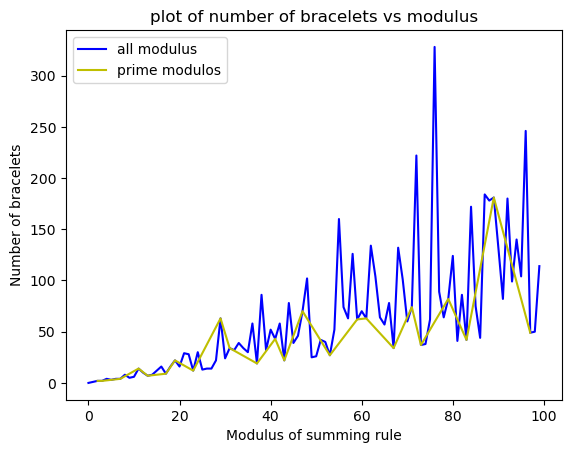

In [4]:
# if you'd like to visualise all bracelet numbers for different modulo edit the below limit
# this simulates all bracelet amounts for all numbers up to (not including) limit
limit=100
mod_vals = [i for i in range(limit)]
bracelet_vals = [bracelet(i)[0] for i in mod_vals]


def sieve_of_eratosthenes(limit):
    """
    simple function to return a list of all prime numbers up the parameter limit
    Parameters
    ----------
    limit: Integer
        number which we return all primes up to. 
    
    """
    prime_flags = [True] * (limit + 1)
    prime_flags[0] = prime_flags[1] = False
    primes = []
    for current in range(2, limit + 1):
        if prime_flags[current]:
            primes.append(current)
            for multiple in range(current * current, limit + 1, current):
                prime_flags[multiple] = False
    return primes

def max_len(mod):
    """
    Simple function to return the maximum length of bracelet with modulo=mod
    Parameters
    ----------
    mod: Integer
        the modulus we use in generating our sequence
    """
    
    lengths = []
    tuples = enum(mod)
    
    for elem in tuples:
        lengths.append(fib_mod(elem[0],elem[1],mod)[1])
    #print(lengths)
    #print(set(lengths))
    return max(lengths)


# ------------------------------------------------------ 
# short script to simulate number of bracelets corresponding to when modulo is a prime number
# used later in the plotting
primes = sieve_of_eratosthenes(limit-1)
bracelet_prime_mods = []
for val in range(limit):
    if val in primes:
        bracelet_prime_mods.append(bracelet_vals[val])
# ------------------------------------------------------   


# ------------------------------------------------------
# The below checks that the sequence beginning with (0,1) does indeed correspond to the maximum length
# sequence for each modulus up to the parameter passed. Note it is a slow function
def max_seq_check(j):
    """
    function which checks if the maximum length of the bracelet is the same as the length of the chain starting
    with (0,1)
    """
    flag = True
    for i in range(2,j):
        
        if fib_mod(0,1,i)[1] != max_len(i):
            flag=False
    return flag
# ------------------------------------------------------
print(f"The statement that  the tuple (0,1) produces a max_length chain up to the value {50} is \
{max_seq_check(50)}")
plt.plot(mod_vals,bracelet_vals,label="all modulus",color = "b")
plt.plot(primes,bracelet_prime_mods,label="prime modulos",color="y")
plt.title("plot of number of bracelets vs modulus")
plt.legend()
plt.xlabel("Modulus of summing rule")
plt.ylabel("Number of bracelets")
plt.show()

In [5]:
# comments on plot
# We can see when simulating chains with prime number moduluses that a lot of the time we get a smaller number
# of bracelets than neighbouring non-prime numbers
# this suggests to me that there is correlation between number of prime-factors and number of possible bracelets
# Evidence is of course inconclusive, but it may be worth further investigation. 